In [1]:
# Take 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

data = pd.read_csv('data/final_df.csv')

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']
target = 'podium'

data['top_10_finish'] = np.where(data[target] <= 10, 1, 0)

X = data[features]
y = data['top_10_finish']

X.fillna(X.median(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7299465240641712


/var/folders/kb/561s54_91_lc_1tqb37w1_ch0000gn/T/ipykernel_7762/2186399031.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


In [2]:
# Take 2
data = pd.read_csv('data/final_df.csv')

features = ['season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
            'constructor_points', 'constructor_standings_pos', 'constructor_wins']

additional_features = ['fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3']

all_features = features + additional_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] != 2023]
y_train = y[data['season'] != 2023]
X_test = X[data['season'] == 2023]
y_test = y[data['season'] == 2023]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

data_2023 = data[data['season'] == 2023].copy()

data_2023.loc[:, 'predicted_probability'] = logreg.predict_proba(X_test_scaled)[:, 1]
top_10_predictions = data_2023.groupby('round').apply(lambda x: x.nlargest(10, 'predicted_probability')).reset_index(drop=True)

print("Accuracy for 2023 season:", accuracy)
print("\n")
unique_rounds = data_2023['round'].unique()
for r in unique_rounds:
    print(f"Round {r} - Top 10 Predictions:")
    round_predictions = top_10_predictions[top_10_predictions['round'] == r]
    print(round_predictions[['season', 'round', 'driver_name', 'predicted_probability']])
    print("\n")

Accuracy for 2023 season: 0.7272727272727273


Round 1 - Top 10 Predictions:
   season  round      driver_name  predicted_probability
0    2023      1  fernando alonso               0.790993
1    2023      1     sergio perez               0.789725
2    2023      1   max verstappen               0.787708
3    2023      1  charles leclerc               0.779327
4    2023      1     lance stroll               0.774819
5    2023      1     lando norris               0.769723
6    2023      1   lewis hamilton               0.768442
7    2023      1      guanyu zhou               0.763711
8    2023      1   george russell               0.760308
9    2023      1  nico hulkenberg               0.758614


Round 2 - Top 10 Predictions:
    season  round      driver_name  predicted_probability
10    2023      2   max verstappen               0.801798
11    2023      2     sergio perez               0.757987
12    2023      2  fernando alonso               0.717223
13    2023      2     lance stro

In [3]:
# Take 3 - To predict top 10 for each round in 2023 season and the accuracy of the predictions 
data = pd.read_csv('data/final_df.csv')

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins'
]

additional_features = [
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3'
]

weather_features = [
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

all_features = features + additional_features + weather_features

for feature in additional_features:
    if 'time' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(100, inplace=True)  

for feature in weather_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

data['top_10_finish'] = np.where(data['podium'] <= 10, 1, 0)

X = data[all_features]
y = data['top_10_finish']

X_train = X[data['season'] != 2023]
y_train = y[data['season'] != 2023]
X_test = X[data['season'] == 2023]
y_test = y[data['season'] == 2023]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

data_2023 = data[data['season'] == 2023].copy()
data_2023.loc[:, 'predicted_probability'] = logreg.predict_proba(X_test_scaled)[:, 1]

top_10_predictions = data_2023.groupby('round').apply(lambda x: x.nlargest(10, 'predicted_probability')).reset_index(drop=True)

print("Accuracy for 2023 season:", accuracy)
print("\n")

unique_rounds = data_2023['round'].unique()
for r in unique_rounds:
    print(f"Round {r} - Top 10 Predictions:")
    round_predictions = top_10_predictions[top_10_predictions['round'] == r]
    print(round_predictions[['season', 'round', 'driver_name', 'predicted_probability']])
    print("\n")

Accuracy for 2023 season: 0.7295454545454545


Round 1 - Top 10 Predictions:
   season  round      driver_name  predicted_probability
0    2023      1  fernando alonso               0.784559
1    2023      1     sergio perez               0.783187
2    2023      1   max verstappen               0.781156
3    2023      1  charles leclerc               0.772461
4    2023      1     lance stroll               0.767738
5    2023      1     lando norris               0.762375
6    2023      1   lewis hamilton               0.761129
7    2023      1      guanyu zhou               0.756163
8    2023      1   george russell               0.752573
9    2023      1  nico hulkenberg               0.751142


Round 2 - Top 10 Predictions:
    season  round      driver_name  predicted_probability
10    2023      2   max verstappen               0.795644
11    2023      2     sergio perez               0.750848
12    2023      2  fernando alonso               0.709151
13    2023      2     lance stro

In [4]:
# Take 1 - To predict top 10 for the entire 2022 season and the accuracy of the predictions
data = pd.read_csv('data/final_df.csv')

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

for feature in features:
    if 'time' in feature or 'laps' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(data[feature].mode()[0], inplace=True)

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

probabilities = logreg.predict_proba(X_test_scaled)[:, 1]

data_2022 = data[data['season'] == 2022].copy()
data_2022['predicted_probability'] = probabilities

driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
top_10_finishers = driver_probabilities.head(10)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for 2022 season:", accuracy)
print("\n")
print("Top 10 Predicted Finishers for 2022 Season:")
print(top_10_finishers)

Accuracy for 2022 season: 0.9681818181818181


Top 10 Predicted Finishers for 2022 Season:
driver_name
max verstappen     0.497468
sergio perez       0.281559
charles leclerc    0.234259
carlos sainz       0.062032
george russell     0.043653
lewis hamilton     0.016938
lando norris       0.000862
esteban ocon       0.000169
fernando alonso    0.000122
valtteri bottas    0.000045
Name: predicted_probability, dtype: float64


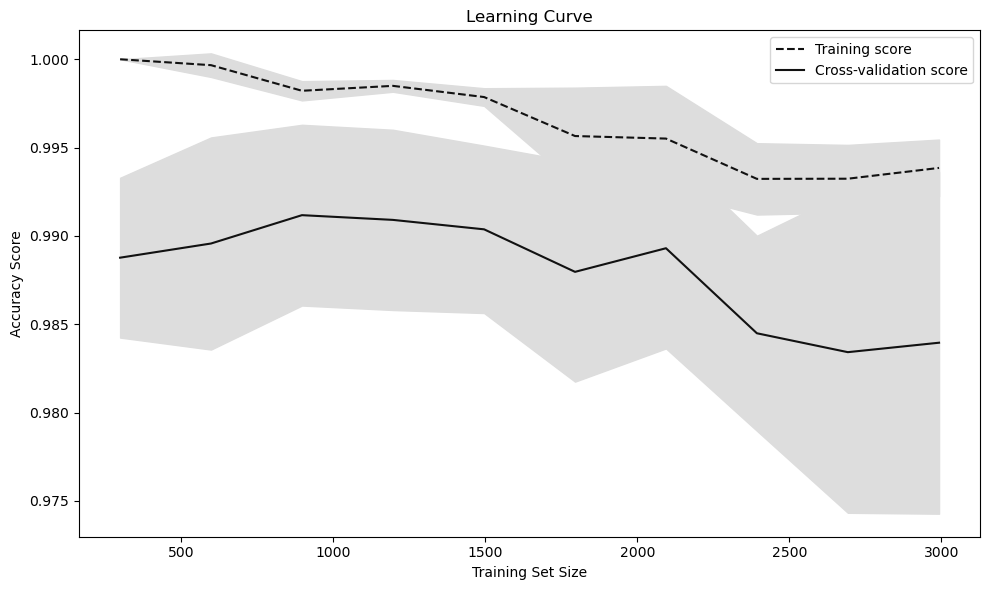

Accuracy for 2022 season: 0.9681818181818181


Top 10 Predicted Finishers for 2022 Season:
driver_name
max verstappen     0.497468
sergio perez       0.281559
charles leclerc    0.234259
carlos sainz       0.062032
george russell     0.043653
lewis hamilton     0.016938
lando norris       0.000862
esteban ocon       0.000169
fernando alonso    0.000122
valtteri bottas    0.000045
Name: predicted_probability, dtype: float64


In [4]:
data = pd.read_csv('data/final_df.csv')

features = [
    'season', 'round', 'driver_points', 'driver_standings_pos', 'driver_wins', 
    'constructor_points', 'constructor_standings_pos', 'constructor_wins',
    'fp_pos_1', 'fp_time_1', 'fp_pos_2', 'fp_time_2', 'fp_pos_3', 'fp_time_3',
    'weather_cloudy', 'weather_cold', 'weather_dry', 'weather_warm', 'weather_wet'
]

for feature in features:
    if 'time' in feature or 'laps' in feature:
        data[feature].fillna(data[feature].median(), inplace=True)
    else:
        data[feature].fillna(data[feature].mode()[0], inplace=True)

data['season_end_top_10'] = data.groupby('season')['driver_points'].transform(lambda x: x >= x.nlargest(10).min())

X = data[features]
y = data['season_end_top_10']

X_train = X[data['season'] < 2022]
y_train = y[data['season'] < 2022]
X_test = X[data['season'] == 2022]
y_test = y[data['season'] == 2022]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_sizes, train_scores, test_scores = learning_curve(logreg, X_scaled, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,6))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

logreg.fit(X_train_scaled, y_train)
probabilities = logreg.predict_proba(X_test_scaled)[:, 1]

data_2022 = data[data['season'] == 2022].copy()
data_2022['predicted_probability'] = probabilities

driver_probabilities = data_2022.groupby('driver_name')['predicted_probability'].mean().sort_values(ascending=False)
top_10_finishers = driver_probabilities.head(10)

y_pred = logreg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy for 2022 season:", accuracy)
print("\n")
print("Top 10 Predicted Finishers for 2022 Season:")
print(top_10_finishers)